In [1]:
#!pip3 install pandas
#!pip3 install sklearn
#!pip3 install torch

In [2]:
import pandas as pd
import numpy as np
import pickle
import math

In [3]:
lat_file="./data/CA_GRACE_DA/csv/LAT.csv"
lon_file="./data/CA_GRACE_DA/csv/LON.csv"
lat_df=pd.read_csv(lat_file)
print(f"Latitude shape {lat_df.shape}")
lon_df=pd.read_csv(lon_file)
print(f"longitutde shape {lon_df.shape}")
print("latitude data")
print(lat_df.to_numpy(copy=True))
print("longitude data")
print(lon_df.to_numpy(copy=True))


Latitude shape (33, 37)
longitutde shape (33, 37)
latitude data
[[42.565 42.565 42.565 ... 42.565 42.565 42.565]
 [42.185 42.185 42.185 ... 42.185 42.185 42.185]
 [41.808 41.808 41.808 ... 41.808 41.808 41.808]
 ...
 [31.956 31.956 31.956 ... 31.956 31.956 31.956]
 [31.625 31.625 31.625 ... 31.625 31.625 31.625]
 [31.295 31.295 31.295 ... 31.295 31.295 31.295]]
longitude data
[[-125.66 -125.29 -124.92 ... -112.97 -112.59 -112.22]
 [-125.66 -125.29 -124.92 ... -112.97 -112.59 -112.22]
 [-125.66 -125.29 -124.92 ... -112.97 -112.59 -112.22]
 ...
 [-125.66 -125.29 -124.92 ... -112.97 -112.59 -112.22]
 [-125.66 -125.29 -124.92 ... -112.97 -112.59 -112.22]
 [-125.66 -125.29 -124.92 ... -112.97 -112.59 -112.22]]


In [4]:
objects = []
with (open("all_data.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [5]:
print(str(len(objects)))
pdata=objects[0]

1


In [6]:
pdata.shape

(168, 20)

In [7]:
pdata.head()

,Year,Month,SCA,Landsat_Image,BW_SCA_Image,Color_SCA_Image,catdef,rzexc,evap,srfexc,sfmc,capac,Snowf,Rainf,prmc,sumwesn,runoff,Tair,RainfC,rzmc
0,2003,1,294585,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 38.347, 58.863, 72.956, 104.4...","[[nan, nan, nan, 2.8021, 3.8333, 3.6458, 2.835...","[[nan, nan, nan, 1.9842, 1.8075, 1.1867, 1.024...","[[nan, nan, nan, -0.25451, -0.26739, -0.30132,...","[[nan, nan, nan, 0.45009, 0.41456000000000004,...","[[nan, nan, nan, 0.07147200000000001, 0.069579...","[[nan, nan, nan, 0.0, 4.0366999999999995e-05, ...","[[nan, nan, nan, 9.8164, 9.1992, 7.3516, 5.421...","[[nan, nan, nan, 0.46491000000000005, 0.42658,...","[[nan, nan, nan, 1.9386e-05, 0.00053811, 0.009...","[[nan, nan, nan, 7.8125, 7.9023, 6.6211, 3.629...","[[nan, nan, nan, 284.14, 283.06, 281.55, 281.1...","[[nan, nan, nan, 0.12506, 0.12585, 0.10165, 0....","[[nan, nan, nan, 0.47278000000000003, 0.442019..."
1,2003,2,19185627,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 54.951, 79.32600000000001, 90...","[[nan, nan, nan, 1.7583, 1.871, 1.7959, 1.2065...","[[nan, nan, nan, 2.3223, 1.939, 1.5134, 1.5090...","[[nan, nan, nan, -0.48801000000000005, -0.486,...","[[nan, nan, nan, 0.43295, 0.39828, 0.36313, 0....","[[nan, nan, nan, 0.067444, 0.10471, 0.092987, ...","[[nan, nan, nan, 0.027298000000000003, 0.04013...","[[nan, nan, nan, 4.377, 4.3574, 3.7314, 2.8877...","[[nan, nan, nan, 0.45143, 0.40968999999999994,...","[[nan, nan, nan, 0.0026054000000000003, 0.0053...","[[nan, nan, nan, 3.4277, 3.8438, 3.5537, 2.386...","[[nan, nan, nan, 281.02, 279.66, 278.21, 278.1...","[[nan, nan, nan, 0.35803, 0.32971, 0.230590000...","[[nan, nan, nan, 0.45508000000000004, 0.42786,..."
2,2003,3,39522095,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 58.096000000000004, 80.846, 9...","[[nan, nan, nan, 3.0619, 3.3489999999999998, 2...","[[nan, nan, nan, 2.252, 2.0894, 1.7779, 1.9288...","[[nan, nan, nan, -0.28013000000000005, -0.2856...","[[nan, nan, nan, 0.43599, 0.40242, 0.365309999...","[[nan, nan, nan, 0.059937, 0.09848, 0.10797000...","[[nan, nan, nan, 0.00029898, 0.001753300000000...","[[nan, nan, nan, 8.875, 8.3047, 6.4688, 5.0547...","[[nan, nan, nan, 0.45028, 0.40975, 0.3652, 0.3...","[[nan, nan, nan, 1.5571999999999999e-06, 9.130...","[[nan, nan, nan, 5.7129, 5.6113, 4.375, 2.9229...","[[nan, nan, nan, 282.26, 281.13, 279.84, 279.9...","[[nan, nan, nan, 0.31006, 0.2572, 0.17047, 0.1...","[[nan, nan, nan, 0.4537, 0.42867, 0.38632, 0.3..."
3,2003,4,53739475,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 50.902, 74.34, 89.059, 98.902...","[[nan, nan, nan, 3.2247, 3.7618, 3.4259, 2.673...","[[nan, nan, nan, 2.4907, 2.2066, 2.021, 2.1504...","[[nan, nan, nan, -0.1607, -0.14800000000000002...","[[nan, nan, nan, 0.44292, 0.40849, 0.3726, 0.3...","[[nan, nan, nan, 0.079956, 0.12982, 0.19555999...","[[nan, nan, nan, 0.38354, 0.65161, 0.88013, 0....","[[nan, nan, nan, 8.6953, 8.5234, 7.334, 6.5078...","[[nan, nan, nan, 0.45588, 0.41511000000000003,...","[[nan, nan, nan, 0.074188, 0.14722000000000002...","[[nan, nan, nan, 6.0234, 6.3164, 5.4961, 4.298...","[[nan, nan, nan, 280.85, 279.66, 278.47, 278.7...","[[nan, nan, nan, 0.68433, 0.58594, 0.42126, 0....","[[nan, nan, nan, 0.46101000000000003, 0.43318,..."
4,2003,5,46363941,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 77.083, 103.3, 112.11, 113.8,...","[[nan, nan, nan, 0.016929, -0.53873, -0.45475,...","[

In [8]:
pdata.tail()

,Year,Month,SCA,Landsat_Image,BW_SCA_Image,Color_SCA_Image,catdef,rzexc,evap,srfexc,sfmc,capac,Snowf,Rainf,prmc,sumwesn,runoff,Tair,RainfC,rzmc
163,2016,8,17512327,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 285.88, 333.63, 336.38, 361.8...","[[nan, nan, nan, -3.9957, -3.1636, -2.1148, -2...","[[nan, nan, nan, 2.2829, 1.8117, 1.4501, 1.449...","[[nan, nan, nan, -2.9419999999999997, -4.0456,...","[[nan, nan, nan, 0.20597, 0.11395999999999999,...","[[nan, nan, nan, 0.031693, 0.022636, 0.0106930...","[[nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[nan, nan, nan, 0.19555999999999998, 0.145390...","[[nan, nan, nan, 0.27215, 0.21264, 0.17815, 0....","[[nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[nan, nan, nan, 0.0034018, 0.0017428, 0.00069...","[[nan, nan, nan, 288.92, 290.51, 292.32, 293.6...","[[nan, nan, nan, 0.00010386, 0.00016248, 0.000...","[[nan, nan, nan, 0.26896, 0.21714, 0.18156, 0...."
164,2016,9,5087669,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 331.28, 365.91, 358.28, 384.0...","[[nan, nan, nan, -1.5957, -0.9429, -0.66165, -...","[[nan, nan, nan, 1.3406, 1.0467, 0.8836, 0.825...","[[nan, nan, nan, -2.6359, -3.0539, -3.2043, -3...","[[nan, nan, nan, 0.16832, 0.11284000000000001,...","[[nan, nan, nan, 0.041504, 0.040649, 0.030525,...","[[nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 3.0652e-0...","[[nan, nan, nan, 0.5219699999999999, 0.4716800...","[[nan, nan, nan, 0.2402, 0.19077, 0.1637900000...","[[nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 1.5960999...","[[nan, nan, nan, 0.02076, 0.013538, 0.00923920...","[[nan, nan, nan, 288.03, 288.31, 288.63, 289.2...","[[nan, nan, nan, 0.014094999999999998, 0.01053...","[[nan, nan, nan, 0.23811999999999997, 0.193999..."
165,2016,10,594940,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 223.11, 249.48, 257.23, 310.7...","[[nan, nan, nan, 9.1253, 9.3519, 8.0082, 6.578...","[[nan, nan, nan, 2.1658, 2.1365, 1.7502, 1.607...","[[nan, nan, nan, -0.16074000000000002, -0.0286...","[[nan, nan, nan, 0.32506, 0.28734, 0.25847, 0....","[[nan, nan, nan, 0.12482, 0.16418, 0.1449, 0.1...","[[nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0087776...","[[nan, nan, nan, 15.375, 14.605, 12.02, 9.082,...","[[nan, nan, nan, 0.33119, 0.2881, 0.24836, 0.2...","[[nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0003911...","[[nan, nan, nan, 4.1367, 3.3604, 2.625, 1.5195...","[[nan, nan, nan, 285.95, 285.0, 283.98, 284.22...","[[nan, nan, nan, 1.4683, 1.4312, 1.146, 0.802,...","[[nan, nan, nan, 0.33171, 0.30241, 0.26164, 0...."
166,2016,11,51564,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 63.858999999999995, 106.34, 1...","[[nan, nan, nan, 3.6924, 4.0215, 3.4236, 3.188...","[[nan, nan, nan, 2.7493, 2.1238, 1.3541, 1.169...","[[nan, nan, nan, -0.30862, -0.36587, -0.448030...","[[nan, nan, nan, 0.43237, 0.38879, 0.339719999...","[[nan, nan, nan, 0.058334000000000004, 0.07733...","[[nan, nan, nan, 0.0, 8.052600000000001e-05, 0...","[[nan, nan, nan, 11.684000000000001, 10.265999...","[[nan, nan, nan, 0.44642, 0.39111999999999997,...","[[nan, nan, nan, 0.0, 4.1943999999999995e-07, ...","[[nan, nan, nan, 7.166, 5.3496, 3.2549, 1.4546...","[[nan, nan, nan, 284.7, 283.15, 281.4, 281.37,...","[[nan, nan, nan, 0.91333, 0.7380399999999999, ...","[[nan, nan, nan, 0.44875, 0.41115, 0.3478, 0.2..."
167,2016,12,40088,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 41.483999999999995, 62.265, 7...","[[nan, nan, nan, 2.2714, 3.14, 3.2687, 2.8329,.

In [9]:
columns=list(pdata.columns)


In [10]:
#pdata[pdata['Year']==2010].head()
pdata.shape

(168, 20)

In [42]:
train_data=pdata.head(n=144)
num_test=pdata.shape[0]-144
test_data=pdata.tail(n=num_test)

print(f"Assuming train is first 144 months (12 years), train data dim is {train_data.shape}")
print(f"Assuming train is last 168-144={num_test} months, train data dim is {test_data.shape}")
train_years=set(train_data['Year'].tolist())
test_years=set(test_data['Year'].tolist())
print(f"Train years : {train_years} ({len(train_years)} years)")
print(f"Test years : {test_years} ({len(test_years)} years)")



Assuming train is first 144 months (12 years), train data dim is (144, 20)
Assuming train is last 168-144=24 months, train data dim is (24, 20)
Train years : {2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014} (12 years)
Test years : {2016, 2015} (2 years)


In [12]:
pdata[['Year','Month']].head()

,Year,Month
0,2003,1
1,2003,2
2,2003,3
3,2003,4
4,2003,5


In [13]:
pdata[['Year','Month']].tail()

,Year,Month
163,2016,8
164,2016,9
165,2016,10
166,2016,11
167,2016,12


In [14]:
str(columns).replace(",","").replace("'","").replace("[","").replace("]","")

'Year Month SCA Landsat_Image BW_SCA_Image Color_SCA_Image catdef rzexc evap srfexc sfmc capac Snowf Rainf prmc sumwesn runoff Tair RainfC rzmc'

In [15]:
columns_reg=[c for c in columns if not c.endswith("_Image")]

In [16]:
data_dictionary=dict()
empty_dict_val=""
data_dictionary['Year']='year of data'
data_dictionary['Month']='month of data'
data_dictionary['SCA']='Star Camera Assembly (SCA) Precisely determines the two satellite\'s orientation by tracking them relative to the position of the stars.   https://earth.esa.int/eogateway/missions/grace'
data_dictionary['catdef']=' catchment deficit (catdef) ; The model prognostic catchment deficit (catdef) [Ducharne et al., 2000] is defined as the average depth of water that would need to be added in order to bring the catchment to saturation and is directly related to the unconfined mean groundwater table depth. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR018417'
data_dictionary['rzexc']='root-zone excess (rzexc) ; Root-zone excess (rzexc) is defined as the amount of water in the root-zone layer (0-100 cm) in excess of the water that would be present if the entire soil moisture profile were in equilibrium. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR018417 ; see also https://aimesproject.org/wp-content/uploads/2021/06/Girotto_AIMES_v2.pdf'
data_dictionary['evap']=empty_dict_val
data_dictionary['srfexc']=' Surface excess (srfexc) is similarly defined as rzexc but for the surface layer (0-5 cm) https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR018417'
data_dictionary['sfmc']='Surface soil moisture content https://journals.ametsoc.org/view/journals/hydr/22/5/JHM-D-20-0228.1.xml  '
data_dictionary['capac']=empty_dict_val
data_dictionary['Snowf']=empty_dict_val
data_dictionary['Rainf']=empty_dict_val
data_dictionary['prmc']='Profile soil moisture content https://journals.ametsoc.org/view/journals/hydr/22/5/JHM-D-20-0228.1.xml'
data_dictionary['sumwesn']=empty_dict_val
data_dictionary['runoff']=empty_dict_val
data_dictionary['Tair']='??? air temperature???  https://essd.copernicus.org/preprints/essd-2020-28/essd-2020-28-manuscript-version2.pdf'
data_dictionary['RainfC']='Rain from Convection (RainfC) (paper)'
data_dictionary['rzmc']='Root-zone soil moisture content https://journals.ametsoc.org/view/journals/hydr/22/5/JHM-D-20-0228.1.xml'

# https://essd.copernicus.org/preprints/essd-2016-55/essd-2016-55.pdf
# https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR018417
#https://journals.ametsoc.org/view/journals/hydr/22/5/JHM-D-20-0228.1.xml

In [17]:
from collections import defaultdict
info_dict=defaultdict(list)
for index, row in pdata.iterrows():
    for c in columns:
        info_dict['col_name'].append(c)
        the_type=str(type(row[c]))
        info_dict['col_type'].append(the_type)

        #dimensions
        if(the_type=="<class 'int'>"):
            info_dict['dim'].append("1")
        elif(the_type=="<class 'PIL.Image.Image'>"):
            info_dict['dim'].append(str(row[c].size))
        elif(the_type=="<class 'numpy.ndarray'>"):
            info_dict['dim'].append(str(row[c].shape))
        else:
            info_dict['dim'].append('na')

        #meaning/note
        if c in data_dictionary:
            info_dict['meaning'].append(data_dictionary[c])
        else:
            info_dict['meaning'].append('')
            
        #units?
        info_dict['units'].append("")
        if(c=='catdef'):
            info_dict['units'][-1]="kg/(m^(2)*h)"
    if(index==0):
        break

In [18]:
import json
#print(json.dumps(info_dict,indent=4))

In [19]:
info_df=pd.DataFrame.from_dict(info_dict)

In [20]:
from IPython.display import display, HTML
display(HTML(info_df.to_html(index=False)))

col_name,col_type,dim,meaning,units
Year,<class 'int'>,1,year of data,
Month,<class 'int'>,1,month of data,
SCA,<class 'int'>,1,Star Camera Assembly (SCA) Precisely determines the two satellite's orientation by tracking them relative to the position of the stars. https://earth.esa.int/eogateway/missions/grace,
Landsat_Image,<class 'PIL.Image.Image'>,"(480, 480)",,
BW_SCA_Image,<class 'PIL.Image.Image'>,"(570, 660)",,
Color_SCA_Image,<class 'PIL.Image.Image'>,"(570, 660)",,
catdef,<class 'numpy.ndarray'>,"(33, 37)","catchment deficit (catdef) ; The model prognostic catchment deficit (catdef) [Ducharne et al., 2000] is defined as the average depth of water that would need to be added in order to bring the catchment to saturation and is directly related to the unconfined mean groundwater table depth. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR018417",kg/(m^(2)*h)
rzexc,<class 'numpy.ndarray'>,"(33, 37)",root-zone excess (rzexc) ; Root-zone excess (rzexc) is defined as the amount of water in the root-zone layer (0-100 cm) in excess of the water that would be present if the entire soil moisture profile were in equilibrium. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR018417 ; see also https://aimesproject.org/wp-content/uploads/2021/06/Girotto_AIMES_v2.pdf,
evap,<class 'numpy.ndarray'>,"(33, 37)",,
srfexc,<class 'numpy.ndarray'>,"(33, 37)",Surface excess (srfexc) is similarly defined as rzexc but for the surface layer (0-5 cm) https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR018417,


cid=9


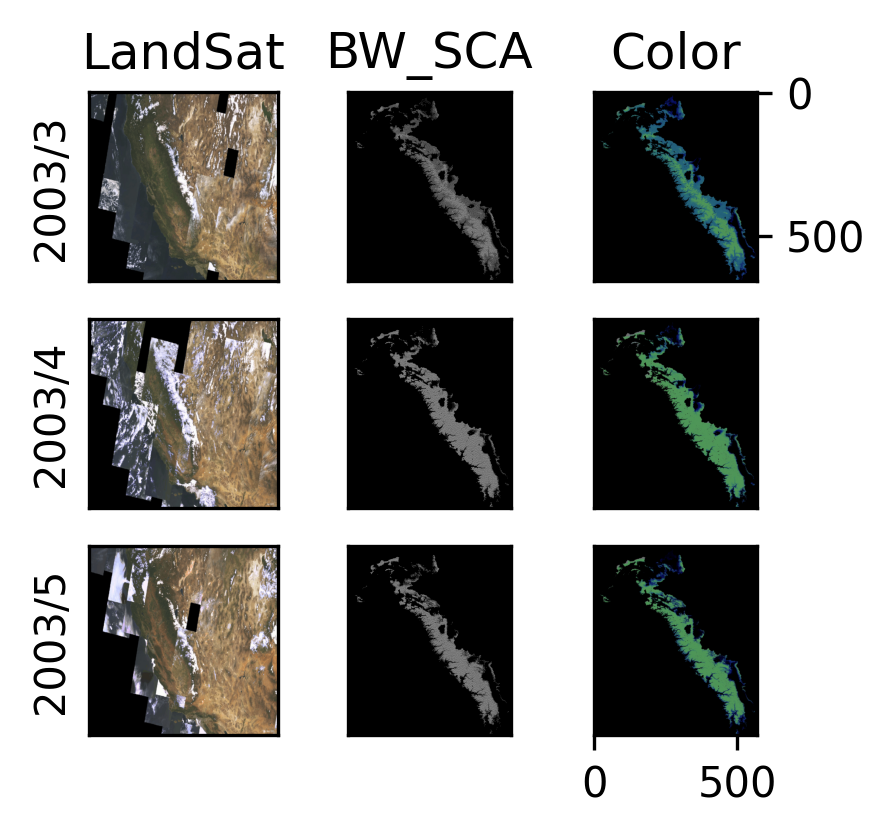

In [21]:
import matplotlib.pyplot as plt
from PIL.Image import Image as PilImage
image_cols=['Landsat_Image','BW_SCA_Image','Color_SCA_Image']
image_cols_abbrev=['LandSat','BW_SCA','Color']
height=168
width=3
bigf=plt.figure(figsize=(width, height),dpi=300)
#bigf.tight_layout()
cid=0
desired_indices=[2,3,4]
for index, row in pdata.iterrows():
    if(not(index in desired_indices)):
        continue
    for i in range(len(image_cols)):
        ic=image_cols[i]
        computed_place=cid+1
        #print(f"index={index}, i={i} ic={ic} computed_place={computed_place}")
        data_for_an_img=row[ic]
        fig=plt.subplot(168,3,computed_place)
        y_axis_name=str(row['Year'])+"/"+str(row['Month'])
        if(i==0):
            fig.set_ylabel(y_axis_name)
        if(index==desired_indices[0] and i>=0):
            #title on top row
            fig.set_title(image_cols_abbrev[i])
            if(i==2):
                fig.tick_params(left=False,bottom=False,labelleft=False,
                                labelbottom=False,right=True,labelright=True)
            else:
                fig.tick_params(left=False,
                    bottom=False,
                    labelleft=False,
                    labelbottom=False)            
        else:
            fig.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
            if(index==desired_indices[-1] and i==2):
                fig.tick_params(left=False,
                    bottom=True,
                    labelleft=False,
                    labelbottom=True)               
        plt.imshow(data_for_an_img)
        cid=cid+1
print(f"cid={cid}")    

In [22]:
#plot all landsat
height=168
width=1
plt.figure(figsize=(width, height))
for index, row in pdata.iterrows():
    computed_place=index+1
    data_for_an_img=row['Landsat_Image']
    #plt.subplot(168,1,index
    
        

<Figure size 72x12096 with 0 Axes>

### LSTM-base-model-1b-bestmodel

In [23]:
file_name = 'data/ca_grace_all_plus_offset.csv'
osdata=pd.read_csv(file_name)

In [24]:
osdata.head()


,month,snowcap,snowcap_offset_1,snowcap_bw_offset_1,snowcap_offset_3,snowcap_bw_offset_3,snowcap_offset_1.1,snowcap_offset_3.1,snowcap_bw,snowcap_avg,...,sfmc,runoff,capac,catdef,Snowf,rzexc,RainfC,rzmc,prmc,evap
0,1.0,2.979813e+11,2.977106e+11,53561.0,2.996800e+11,973276.0,2.977106e+11,2.996800e+11,294585.0,9.612301e+09,...,176.212138,621.445111,10.807113,308444.087,76.347303,707.258484,17.374478,194.840829,198.172161,644.21295
1,2.0,2.835708e+11,2.979813e+11,294585.0,2.883365e+11,104036.0,2.979813e+11,2.883365e+11,19185627.0,1.012753e+10,...,191.026888,546.750853,11.538916,284341.677,315.991364,562.804908,87.382864,207.005523,211.130071,980.11345
2,3.0,3.262106e+11,2.835708e+11,19185627.0,2.977106e+11,53561.0,2.835708e+11,2.977106e+11,39522095.0,1.052292e+10,...,183.253912,554.630849,13.538214,279964.037,174.247548,29.251186,60.586443,207.414268,212.279017,1406.39418
3,4.0,3.253270e+11,3.262106e+11,39522095.0,2.979813e+11,294585.0,3.262106e+11,2.979813e+11,53739475.0,1.084423e+10,...,177.384923,757.990836,21.185279,284377.606,520.646940,-158.552112,125.486875,203.518637,208.689142,1582.06131
4,5.0,3.315039e+11,3.253270e+11,53739475.0,2.835708e+11,19185627.0,3.253270e+11,2.835708e+11,46363941.0,1.069367e+10,...,158.130730,328.847681,11.066942,289032.203,138.852295,-1563.033878,69.069734,198.297260,204.062225,2021.60086


In [25]:
osdata.shape

(168, 25)

####  From LSTM-base-model-1b-bestmodel, sort the catdef data and get a preview ; also see where 308444.087 falls

In [26]:
osdata[osdata['catdef']==308444.087][['month','catdef']]

,month,catdef
0,1.0,308444.087


In [27]:
lstm_sorted_catdef=sorted(osdata['catdef'].tolist())
print(json.dumps(lstm_sorted_catdef[:5],indent=4))

[
    233208.92,
    238432.183,
    242260.89900000003,
    249886.867,
    250985.262
]


#### Now, from "all_data.pkl" get a sum of catdata for each row

In [28]:
cat_data_sums_sums=list()
cat_data_sums_months=list()
cat_data_sums_years=list()
for index, row in pdata.iterrows():
    cat_data_sums_months.append(row['Month'])
    cat_data_sums_years.append(row['Year'])
    catdef_arr=row['catdef'].flatten()
    catdef_non_nan=[c for c in catdef_arr if not math.isnan(c)]
    catdef_non_nan_sum=sum(catdef_non_nan)
    cat_data_sums_sums.append(catdef_non_nan_sum)
sums_dict={
    'Year':cat_data_sums_years,
    'Month': cat_data_sums_months,
    'CatDefSum':cat_data_sums_sums    
}
catdef_sums_df=pd.DataFrame.from_dict(sums_dict)
catdef_sums_df.head()

,Year,Month,CatDefSum
0,2003,1,314149.780
1,2003,2,290470.223
2,2003,3,285315.834
3,2003,4,290020.228
4,2003,5,294718.503


In [29]:
catdef_sums_df[catdef_sums_df.apply(
    lambda row:300000<row['CatDefSum'] and row['CatDefSum']<315000,axis=1)].sort_values('CatDefSum')


,Year,Month,CatDefSum
51,2007,4,300132.805
15,2004,4,300561.382
74,2009,3,300764.750
61,2008,2,301101.720
88,2010,5,301321.167
111,2012,4,304165.975
48,2007,1,304544.673
101,2011,6,305304.360
13,2004,2,306912.638
85,2010,2,307955.361


####  Now, explore "disc_snow.csv" !

In [30]:
disc_snow_df=pd.read_csv('data/disc_snow.csv')

In [31]:
disc_snow_df.columns

Index(['month', 'discharge', 'snowcap'], dtype='object')

In [32]:
disc_snow_df[disc_snow_df.apply(lambda row:308000<row['discharge'] and row['discharge']<309000,axis=1)]

,month,discharge,snowcap
0,1.0,308444.087,2.979813e+11
52,5.0,308654.500,3.296559e+11


In [33]:
disc_snow_df[disc_snow_df.apply(lambda row:308443<row['discharge'] and row['discharge']<308445,axis=1)]

,month,discharge,snowcap
0,1.0,308444.087,2.979813e+11


# SIERRA

In [34]:
import h5py

In [35]:
h5_file="./data/SIERRA_NEVADA/v0/SCA/SN_SCA_WY2010.h5"
import os
os.system("stat "+h5_file)

  File: ./data/SIERRA_NEVADA/v0/SCA/SN_SCA_WY2010.h5
  Size: 631833581 	Blocks: 1234064    IO Block: 4096   regular file
Device: 821h/2081d	Inode: 42205216    Links: 1
Access: (0664/-rw-rw-r--)  Uid: ( 1000/ UNKNOWN)   Gid: ( 1000/ UNKNOWN)
Access: 2022-02-11 20:57:03.454186346 +0000
Modify: 2016-06-17 20:11:42.000000000 +0000
Change: 2022-01-23 02:44:23.304680886 +0000
 Birth: -


0

In [36]:
data_2010 = h5py.File(h5_file, 'r')

In [37]:
data_2010.keys()

<KeysViewHDF5 ['SCA', 'lat', 'lon']>

In [38]:
#sca_2010 = np.array(data_2010['SCA'])

#### Extract Catdef for ARIMA

In [40]:
extraction_dir="catdef_extraction"
os.system("mkdir -v "+extraction_dir)

mkdir: cannot create directory ‘catdef_extraction’: File exists


256

In [ ]:
catdef_dims=pdata.apply(lambda row:row['catdef'].shape,axis=1).tolist()[0]


In [ ]:
catdef_dims

In [ ]:
for row_idx in range(catdef_dims[0]):
    print(f"row is {row_idx} of {catdef_dims[0]} ...")
    for col_idx in range(catdef_dims[1]):
        the_header=f"catdef_row.{row_idx}.col.{col_idx}"
        csv_target=f"{extraction_dir}/catddef.{the_header}.csv"
        the_data=pdata.apply(lambda row:row['catdef'].item((row_idx,col_idx)),axis=1).tolist()
        #print("the_data len is "+str(len(the_data)))
        #print(f"The target {csv_target}")
        temp_df=pd.DataFrame.from_dict({the_header:the_data})
        temp_df.to_csv(csv_target,index=False)
        #break
    #break